### Patient Categorization

Categorize patients according to how urgently they need medical care, with a particular importance placed on identifying all patients needing immediate resuscitation.


In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import tensorflow as tf


import warnings

warnings.filterwarnings('ignore')





In [2]:
def plot_scatter_plot(data, x,y, hue ):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, y=y, x=x, hue=hue, palette='tab10')
    title = 'Scatter Plot of', x, ' vs ', y, ' by ' , hue
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Cluster')
    plt.show()

In [3]:
# reading the data
data = pd.read_csv('patient_priority.csv')
data.head()

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0           0  40.0     1.0              2.0           140.0        294.0   
1           1  49.0     0.0              3.0           160.0        180.0   
2           2  37.0     1.0              2.0           130.0        294.0   
3           3  48.0     0.0              4.0           138.0        214.0   
4           4  54.0     1.0              3.0           150.0        195.0   

   max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0           172.0              0.0           108.0            43.0     92.0   
1           156.0              0.0            75.0            47.0     90.0   
2           156.0              0.0            98.0            53.0    102.0   
3           156.0              1.0            72.0            51.0    118.0   
4           156.0              0.0           108.0            90.0     83.0   

    bmi  diabetes_pedigree  hypertension  heart_disease Residence_type  \
0  19.0           0.467386           0.0            0.0          Urban   
1  18.0           0.467386           0.0            0.0          Urban   
2  23.0           0.467386           0.0            0.0          Urban   
3  18.0           0.467386           0.0            0.0          Urban   
4  21.0           0.467386           0.0            0.0          Urban   

  smoking_status  triage  
0   never smoked  yellow  
1   never smoked  orange  
2   never smoked  yellow  
3   never smoked  orange  
4   never smoked  yellow

In [4]:
data = data.drop(data.columns[0], axis=1)
data.describe()


age       gender  chest pain type  blood pressure  cholesterol  \
count  6962.000000  6961.000000      6962.000000     6962.000000  6962.000000   
mean     57.450014     0.531964         0.529015      109.629991   184.711290   
std      11.904948     0.499013         1.253791       21.534852    32.010359   
min      28.000000     0.000000         0.000000       60.000000   150.000000   
25%      48.000000     0.000000         0.000000       92.000000   164.000000   
50%      56.000000     1.000000         0.000000      111.000000   179.000000   
75%      66.000000     1.000000         0.000000      127.000000   192.000000   
max      82.000000     1.000000         4.000000      165.000000   294.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count     6962.000000      6962.000000     6962.000000     6962.000000   
mean       163.502442         0.061764       98.394283       56.813416   
std         15.458693         0.240743       28.598084       22.889316   
min        138.000000         0.000000       55.120000       21.000000   
25%        150.000000         0.000000       78.707500       36.000000   
50%        163.000000         0.000000       93.000000       55.000000   
75%        177.000000         0.000000      111.632500       77.000000   
max        202.000000         1.000000      199.000000       99.000000   

           insulin          bmi  diabetes_pedigree  hypertension  \
count  6962.000000  6962.000000        6962.000000   6962.000000   
mean    111.091640    27.190908           0.467386      0.071531   
std      17.470033     7.362886           0.102663      0.257729   
min      81.000000    10.300000           0.078000      0.000000   
25%      97.000000    21.800000           0.467386      0.000000   
50%     111.000000    26.200000           0.467386      0.000000   
75%     125.000000    31.000000           0.467386      0.000000   
max     171.000000    66.800000           2.420000      1.000000   

       heart_disease  
count    6962.000000  
mean        0.039500  
std         0.194796  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

### Explanation

This dataset presents descriptive statistics for a patient classification dataset with 6,962 entries across various features related to health indicators. The following variables are included:

Age: Ranges from 28 to 82, with a mean of 57.45 years. The standard deviation (11.90) shows some variability, and the distribution is slightly skewed toward older patients.
Gender: Encoded as 0 and 1 (most likely male and female), with a near-equal split (mean 0.53).
Chest Pain Type: This categorical variable has a range from 0 to 4, with an average of 0.53 and a wide spread (std 1.25).
Blood Pressure: A mean of 109.63 mmHg, with a standard deviation of 21.53, indicating moderate variation.
Cholesterol: Ranges from 150 to 294, with a mean of 184.71 and a standard deviation of 32.01.
Max Heart Rate: The average maximum heart rate is 163.50 beats per minute, with a range between 138 and 202.
Exercise Angina: A binary variable (0 or 1) with a low mean (0.061), indicating few patients experienced angina during exercise.
Plasma Glucose: Mean is 98.39, with a standard deviation of 28.60, suggesting variability in blood sugar levels.
Skin Thickness: Averages around 56.81 mm with a range from 21 to 99, indicating skin fold thickness measurements.
Insulin: Ranges from 81 to 171, with a mean of 111.09. The standard deviation (17.47) suggests modest variation.
BMI (Body Mass Index): The average BMI is 27.19, with a range between 10.3 and 66.8, indicating varied body composition among the patients.
Diabetes Pedigree: Mean value is 0.47, which measures genetic risk for diabetes, with a moderate variation (std 0.10).
Hypertension: A binary variable (0 or 1), with a low average of 0.071, meaning a small portion of the patients are hypertensive.
Heart Disease: Another binary variable (0 or 1), with a mean of 0.0395, indicating that around 4% of the patients in the dataset have heart disease.


This dataset includes health-related variables with numerical and categorical data about patients' demographics and health metrics. The data is relatively balanced in terms of gender, though most other variables like chest pain type, exercise angina, hypertension, and heart disease show strong skew towards 0 (low incidence). Metrics such as age, blood pressure, cholesterol, and maximum heart rate exhibit natural variation typical for a medical dataset, while indicators like plasma glucose, skin thickness, and insulin vary significantly, likely reflecting different metabolic conditions among the patients.


In [5]:
# checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6962 non-null   float64
 1   gender             6961 non-null   float64
 2   chest pain type    6962 non-null   float64
 3   blood pressure     6962 non-null   float64
 4   cholesterol        6962 non-null   float64
 5   max heart rate     6962 non-null   float64
 6   exercise angina    6962 non-null   float64
 7   plasma glucose     6962 non-null   float64
 8   skin_thickness     6962 non-null   float64
 9   insulin            6962 non-null   float64
 10  bmi                6962 non-null   float64
 11  diabetes_pedigree  6962 non-null   float64
 12  hypertension       6962 non-null   float64
 13  heart_disease      6962 non-null   float64
 14  Residence_type     6962 non-null   object 
 15  smoking_status     6962 non-null   object 
 16  triage             6552 

### Observation

From the data.info() output, we can observe the following:

Total entries: The dataset has 6,962 entries (rows).
Columns: There are 17 columns in total, with 14 numerical (float64) columns and 3 categorical (object) columns.

#### Missing Values:
The 'gender' column has one missing value (6,961 non-null values).

The 'triage' column has 410 missing values (6,552 non-null values).

Memory Usage: The dataset consumes approximately 924.8 KB of memory.

#### Data Types:
Most of the columns are numerical (such as age, blood pressure, cholesterol), stored as float64.
The categorical columns are 'Residence_type', 'smoking_status', and 'triage', which are stored as object.

Overall, the dataset is mostly complete, with only a few missing values in the 'gender' and 'triage' columns. The presence of both numerical and categorical data suggests that data preprocessing steps like handling missing values and encoding categorical variables will be necessary before applying machine learning models.









In [6]:
#Checking for duplicates
duplicates = data[data.duplicated()]
duplicates

Empty DataFrame
Columns: [age, gender, chest pain type, blood pressure, cholesterol, max heart rate, exercise angina, plasma glucose, skin_thickness, insulin, bmi, diabetes_pedigree, hypertension, heart_disease, Residence_type, smoking_status, triage]
Index: []

## There are no Duplicates in the dataset

In [7]:
missing_values = data.isnull().sum()
#m =data.isnull()

# Display columns that have missing values
print(missing_values[missing_values > 0])

gender      1
triage    410
dtype: int64


In [8]:
# Fill missing 'gender' values with mode
data['gender'].fillna(data['gender'].mode()[0], inplace=True)


In [9]:
# Drop rows with missing 'triage' values
data.dropna(subset=['triage'], inplace=True)

#### Explanation
We are droping the missing triage data because first it is a categorical field and the 'triage' column had 410 missing values out of 6,962 total rows. This means about 6% of the data in this column was missing. Filling such a large number of missing values could introduce bias or inaccuracies in the dataset, especially if the missing values represent a significant portion of the data.

In [10]:
data.head(100)

age  gender  chest pain type  blood pressure  cholesterol  \
0    40.0     1.0              2.0           140.0        294.0   
1    49.0     0.0              3.0           160.0        180.0   
2    37.0     1.0              2.0           130.0        294.0   
3    48.0     0.0              4.0           138.0        214.0   
4    54.0     1.0              3.0           150.0        195.0   
..    ...     ...              ...             ...          ...   
97   56.0     1.0              4.0           120.0        207.0   
98   41.0     1.0              2.0           125.0        294.0   
99   65.0     1.0              4.0           130.0        294.0   
100  51.0     1.0              4.0           130.0        179.0   
101  40.0     0.0              4.0           150.0        294.0   

     max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0             172.0              0.0           108.0            43.0     92.0   
1             156.0              0.0            75.0            47.0     90.0   
2             156.0              0.0            98.0            53.0    102.0   
3             156.0              1.0            72.0            51.0    118.0   
4             156.0              0.0           108.0            90.0     83.0   
..              ...              ...             ...             ...      ...   
97            140.0              0.0            90.0            35.0    139.0   
98            144.0              0.0            86.0            73.0    135.0   
99            144.0              1.0           116.0            72.0    112.0   
100           144.0              0.0            71.0            89.0    108.0   
101           144.0              0.0            70.0            65.0    122.0   

      bmi  diabetes_pedigree  hypertension  heart_disease Residence_type  \
0    19.0           0.467386           0.0            0.0          Urban   
1    18.0           0.467386           0.0            0.0          Urban   
2    23.0           0.467386           0.0            0.0          Urban   
3    18.0           0.467386           0.0            0.0          Urban   
4    21.0           0.467386           0.0            0.0          Urban   
..    ...                ...           ...            ...            ...   
97   18.0           0.467386           0.0            0.0          Urban   
98   18.0           0.467386           0.0            0.0          Urban   
99   18.0           0.467386           0.0            0.0          Urban   
100  21.0           0.467386           0.0            0.0          Urban   
101  18.0           0.467386           0.0            0.0          Urban   

    smoking_status  triage  
0     never smoked  yellow  
1     never smoked  orange  
2     never smoked  yellow  
3     never smoked  orange  
4     never smoked  yellow  
..             ...     ...  
97    never smoked  yellow  
98    never smoked  yellow  
99    never smoked  yellow  
100   never smoked  yellow  
101   never smoked  orange  

[100 rows x 17 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6552 entries, 0 to 6961
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6552 non-null   float64
 1   gender             6552 non-null   float64
 2   chest pain type    6552 non-null   float64
 3   blood pressure     6552 non-null   float64
 4   cholesterol        6552 non-null   float64
 5   max heart rate     6552 non-null   float64
 6   exercise angina    6552 non-null   float64
 7   plasma glucose     6552 non-null   float64
 8   skin_thickness     6552 non-null   float64
 9   insulin            6552 non-null   float64
 10  bmi                6552 non-null   float64
 11  diabetes_pedigree  6552 non-null   float64
 12  hypertension       6552 non-null   float64
 13  heart_disease      6552 non-null   float64
 14  Residence_type     6552 non-null   object 
 15  smoking_status     6552 non-null   object 
 16  triage             6552 non-n

In [12]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
#m =data.isnull()

# Display columns that have missing values
print(missing_values[missing_values > 0])
#m

Series([], dtype: int64)


In [13]:
label = data[['triage']]
label.head()

triage
0  yellow
1  orange
2  yellow
3  orange
4  yellow

In [14]:
features = data.drop(columns='triage')
features.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0  40.0     1.0              2.0           140.0        294.0           172.0   
1  49.0     0.0              3.0           160.0        180.0           156.0   
2  37.0     1.0              2.0           130.0        294.0           156.0   
3  48.0     0.0              4.0           138.0        214.0           156.0   
4  54.0     1.0              3.0           150.0        195.0           156.0   

   exercise angina  plasma glucose  skin_thickness  insulin   bmi  \
0              0.0           108.0            43.0     92.0  19.0   
1              0.0            75.0            47.0     90.0  18.0   
2              0.0            98.0            53.0    102.0  23.0   
3              1.0            72.0            51.0    118.0  18.0   
4              0.0           108.0            90.0     83.0  21.0   

   diabetes_pedigree  hypertension  heart_disease Residence_type  \
0           0.467386           0.0            0.0          Urban   
1           0.467386           0.0            0.0          Urban   
2           0.467386           0.0            0.0          Urban   
3           0.467386           0.0            0.0          Urban   
4           0.467386           0.0            0.0          Urban   

  smoking_status  
0   never smoked  
1   never smoked  
2   never smoked  
3   never smoked  
4   never smoked

### Label Encoding

In [15]:
data_encoded  = pd.get_dummies(features, columns=['Residence_type', 'smoking_status'])
#data_encoded['Residence_type_Rural'] = data_encoded['Residence_type_Rural'].astype(int)
#data_encoded['Residence_type_Urban'] = data_encoded['Residence_type_Urban'].astype(int)
#data_encoded['smoking_status_Unknown'] = data_encoded['smoking_status_Unknown'].astype(int)
#data_encoded['smoking_status_formerly smoked'] = data_encoded['smoking_status_formerly smoked'].astype(int)
#data_encoded['smoking_status_never smoked'] = data_encoded['smoking_status_never smoked'].astype(int)
#data_encoded['smoking_status_smokes'] = data_encoded['smoking_status_smokes'].astype(int)
data_encoded.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0  40.0     1.0              2.0           140.0        294.0           172.0   
1  49.0     0.0              3.0           160.0        180.0           156.0   
2  37.0     1.0              2.0           130.0        294.0           156.0   
3  48.0     0.0              4.0           138.0        214.0           156.0   
4  54.0     1.0              3.0           150.0        195.0           156.0   

   exercise angina  plasma glucose  skin_thickness  insulin   bmi  \
0              0.0           108.0            43.0     92.0  19.0   
1              0.0            75.0            47.0     90.0  18.0   
2              0.0            98.0            53.0    102.0  23.0   
3              1.0            72.0            51.0    118.0  18.0   
4              0.0           108.0            90.0     83.0  21.0   

   diabetes_pedigree  hypertension  heart_disease  Residence_type_Rural  \
0           0.467386           0.0            0.0                 False   
1           0.467386           0.0            0.0                 False   
2           0.467386           0.0            0.0                 False   
3           0.467386           0.0            0.0                 False   
4           0.467386           0.0            0.0                 False   

   Residence_type_Urban  smoking_status_Unknown  \
0                  True                   False   
1                  True                   False   
2                  True                   False   
3                  True                   False   
4                  True                   False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                           False                         True   
1                           False                         True   
2                           False                         True   
3                           False                         True   
4                           False                         True   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

In [16]:
corr = data_encoded.corr()
corr

age    gender  chest pain type  \
age                             1.000000 -0.124850        -0.157544   
gender                         -0.124850  1.000000         0.221062   
chest pain type                -0.157544  0.221062         1.000000   
blood pressure                  0.047221 -0.097393         0.399223   
cholesterol                    -0.109924  0.126950         0.686920   
max heart rate                  0.002236 -0.067525        -0.186019   
exercise angina                -0.056288  0.188900         0.648378   
plasma glucose                 -0.047757  0.124419        -0.018638   
skin_thickness                  0.076758 -0.095748         0.065345   
insulin                        -0.022634  0.037414        -0.035455   
bmi                            -0.009990 -0.161924        -0.418828   
diabetes_pedigree              -0.005914 -0.001619         0.000756   
hypertension                    0.149782 -0.051771        -0.124288   
heart_disease                   0.183580  0.023413        -0.090953   
Residence_type_Rural            0.118118 -0.174717        -0.327828   
Residence_type_Urban           -0.118118  0.174717         0.327828   
smoking_status_Unknown          0.103869 -0.082218        -0.225936   
smoking_status_formerly smoked  0.118063 -0.049803        -0.168869   
smoking_status_never smoked    -0.163492  0.150411         0.401982   
smoking_status_smokes          -0.002161 -0.076462        -0.159063   

                                blood pressure  cholesterol  max heart rate  \
age                                   0.047221    -0.109924        0.002236   
gender                               -0.097393     0.126950       -0.067525   
chest pain type                       0.399223     0.686920       -0.186019   
blood pressure                        1.000000     0.314891       -0.100954   
cholesterol                           0.314891     1.000000       -0.104044   
max heart rate                       -0.100954    -0.104044        1.000000   
exercise angina                       0.267020     0.437700       -0.157962   
plasma glucose                       -0.123191    -0.011560       -0.016647   
skin_thickness                        0.203489     0.040295       -0.005084   
insulin                              -0.086020    -0.027479       -0.003008   
bmi                                  -0.153851    -0.316061        0.073727   
diabetes_pedigree                     0.007723     0.001334       -0.004137   
hypertension                         -0.008071    -0.091675        0.026233   
heart_disease                        -0.004201    -0.065820        0.011747   
Residence_type_Rural                  0.011343    -0.237470        0.075815   
Residence_type_Urban                 -0.011343     0.237470       -0.075815   
smoking_status_Unknown                0.006939    -0.166141        0.032588   
smoking_status_formerly smoked        0.000269    -0.130866        0.018402   
smoking_status_never smoked          -0.009515     0.305781       -0.071129   
smoking_status_smokes                 0.005645    -0.125739        0.049530   

                                exercise angina  plasma glucose  \
age                                   -0.056288       -0.047757   
gender                                 0.188900        0.124419   
chest pain type                        0.648378       -0.018638   
blood pressure                         0.267020       -0.123191   
cholesterol                            0.437700       -0.011560   
max heart rate                        -0.157962       -0.016647   
exercise angina                        1.000000       -0.014311   
plasma glucose                        -0.014311        1.000000   
skin_thickness                         0.047372       -0.092766   
insulin                               -0.025270        0.052698   
bmi                                   -0.254151        0.014645   
diabetes_pedigree                      0.000458        0.037871   
hypertension  

<Axes: >

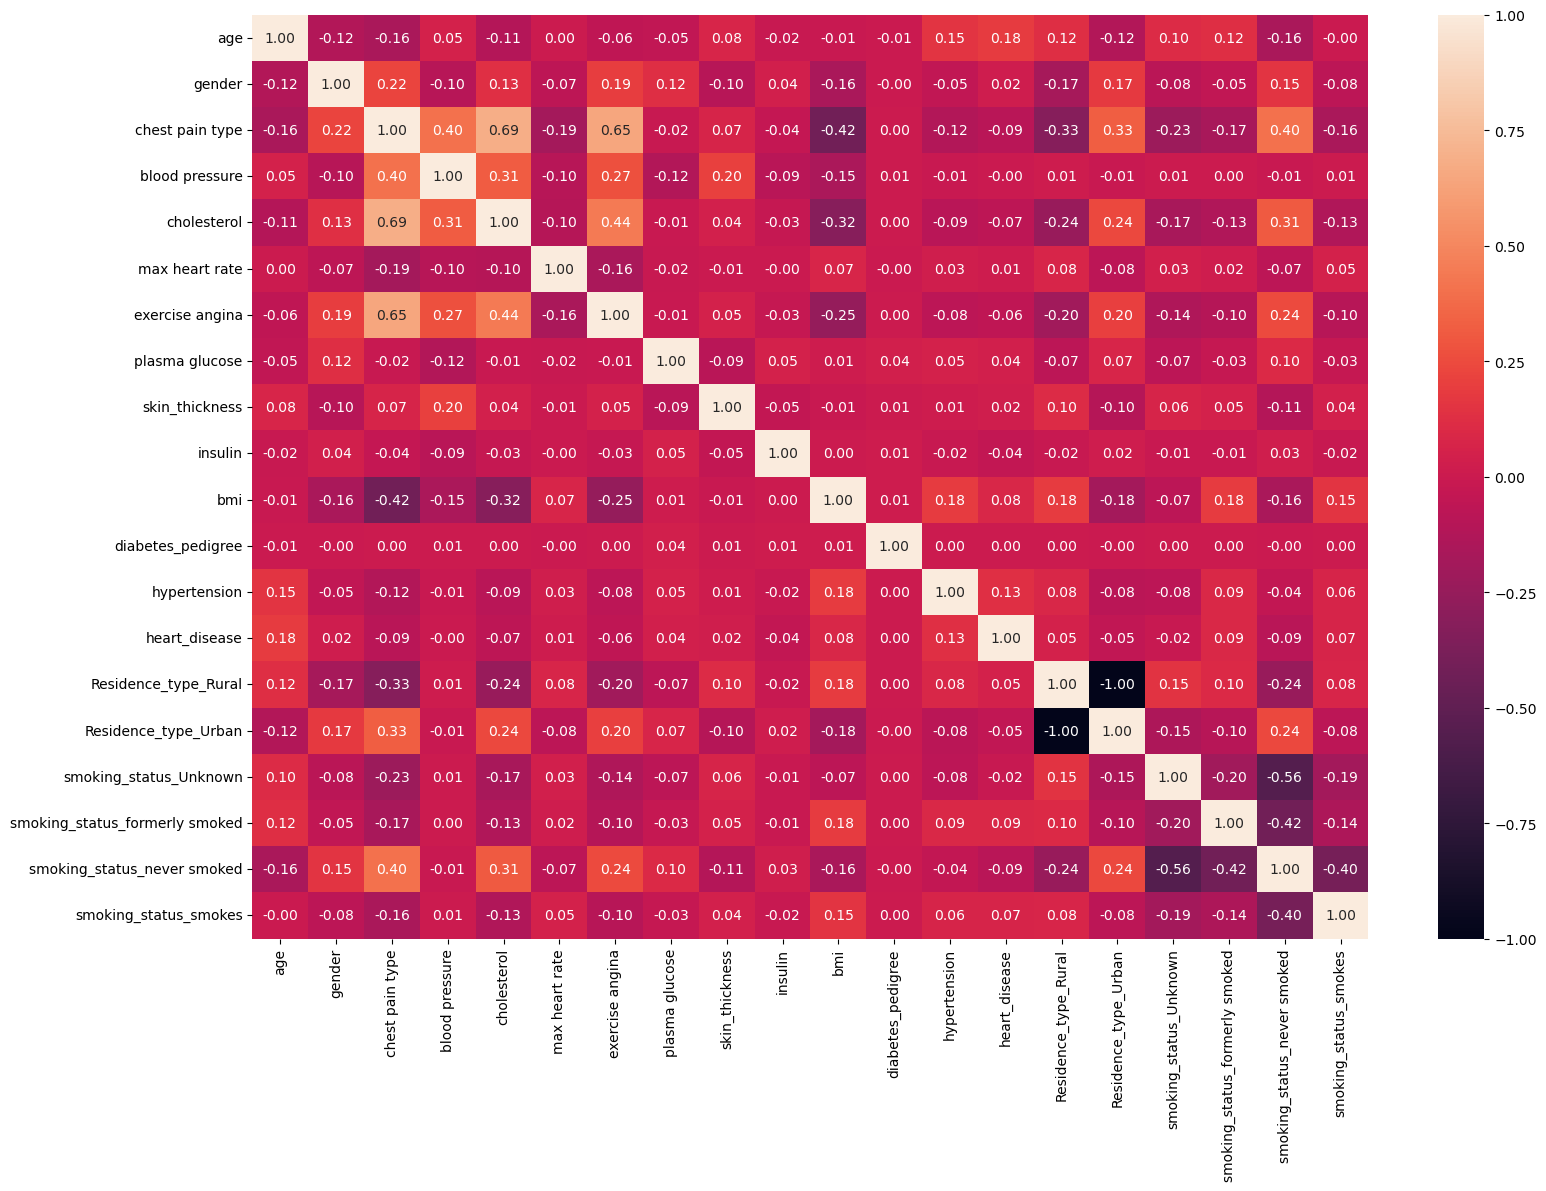

In [552]:
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True , fmt='.2f')


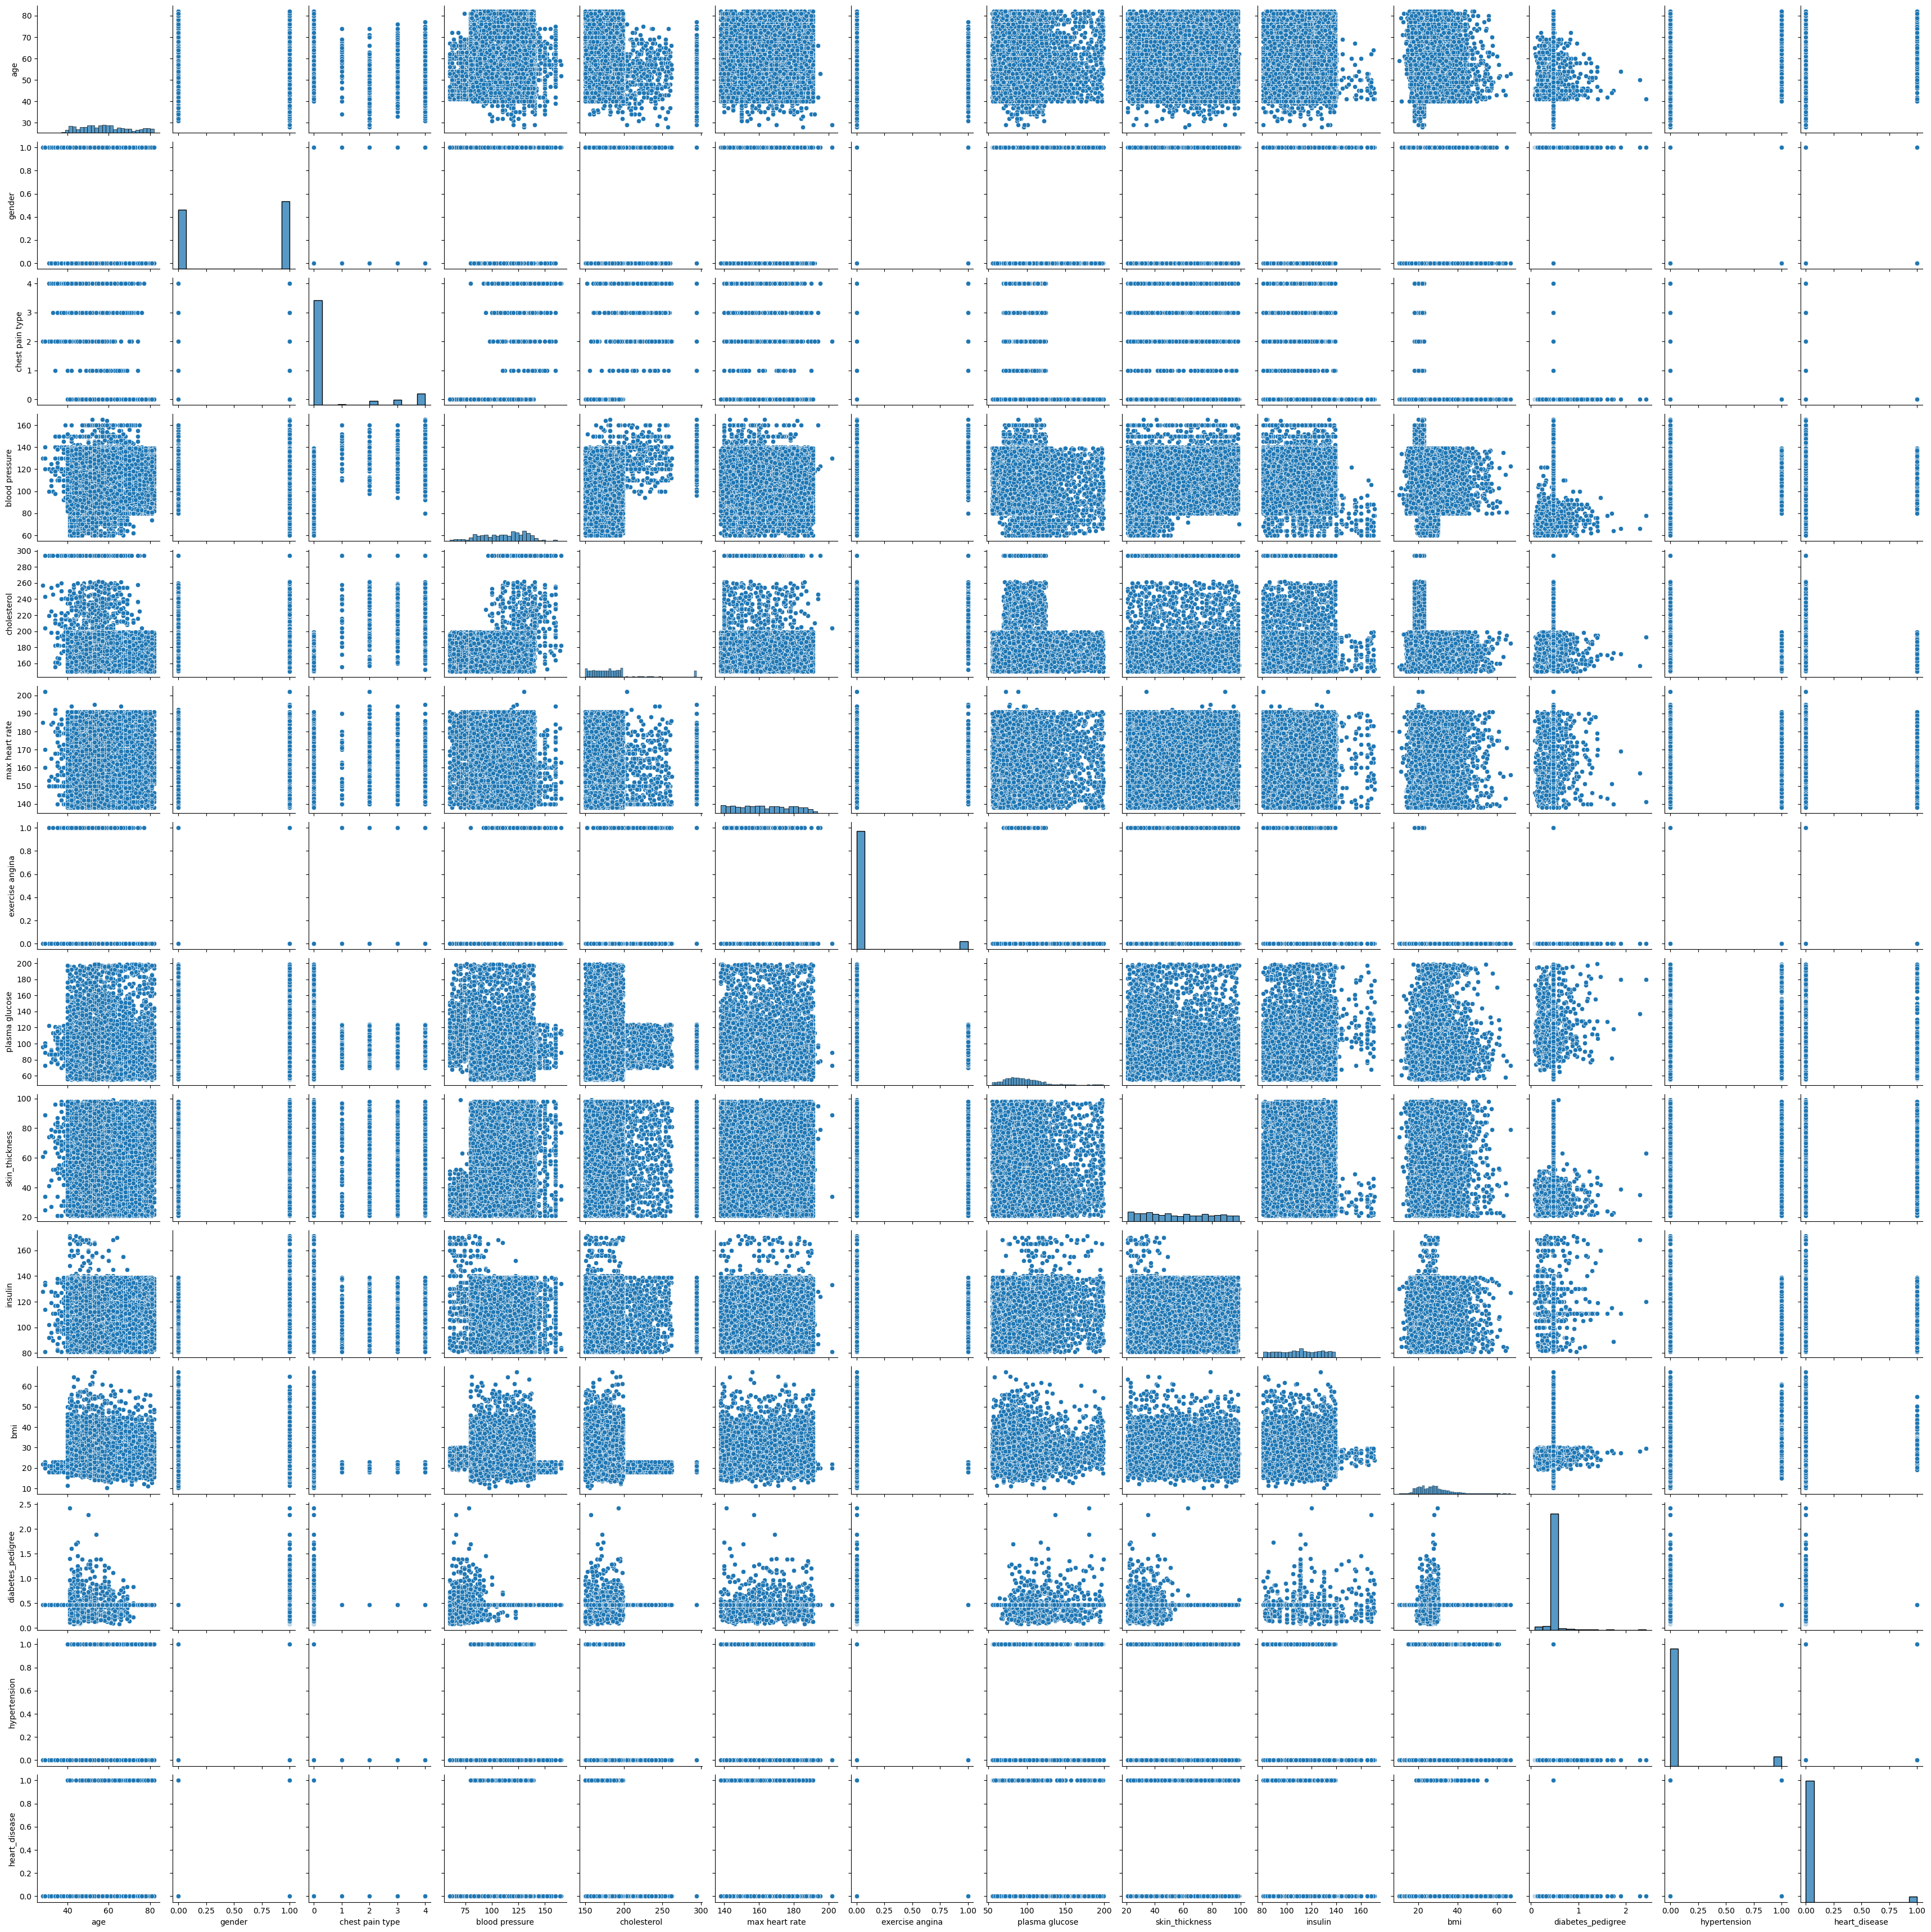

In [553]:
sns.pairplot(features)

### Explanation

This correlation table displays the relationships between various features in the dataset, with values ranging from -1 to 1:


A value close to 1 indicates a strong positive correlation, meaning as one feature increases, the other tends to increase.

A value close to -1 indicates a strong negative correlation, meaning as one feature increases, the other tends to decrease.

A value close to 0 suggests little to no linear relationship between the features.

### Key Observations:
#### Strong Correlations:

Chest pain type and heart disease (0.687): This strong positive correlation suggests that chest pain type is highly associated with heart disease.

Cholesterol and chest pain type (0.687): Higher cholesterol levels are linked to chest pain type, indicating a possible relationship between cholesterol and cardiovascular issues.

#### Negative Correlations:

Smoking status (never smoked) and Residence type (Rural) (-0.238): Individuals in rural areas tend to have lower instances of 'never smoked' status.

Smoking status (never smoked) and cholesterol (-0.316): This indicates that people who never smoked tend to have lower cholesterol levels.

#### Weak or No Correlation:

Insulin and max heart rate (0.002): There's no significant relationship between insulin levels and maximum heart rate.

Diabetes pedigree and heart disease (0.001): Minimal relationship between genetic diabetes risk and heart disease.

#### Residence Type:

Rural and Urban are perfectly inversely correlated (-1.0): As expected, these categories are mutually exclusive.

#### Gender:

Gender and chest pain type (0.221): Gender has a moderate correlation with chest pain type, suggesting a possible gender-based variation in chest pain symptoms.

Gender and smoking status (smokes) (0.150): Men might have a slightly higher tendency to smoke based on this moderate correlation.

In summary, the correlation table, heatmap and pairplot reveals significant relationships between chest pain, cholesterol, and heart disease, while some features, such as insulin and max heart rate, show minimal interaction. 
This can guide further analysis, particularly around cardiovascular health.

In [17]:
# Scalling the dataset
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data_encoded)
scaled_data_frame = pd.DataFrame(scaled_data, columns=data_encoded.columns)
scaled_data_frame.head()

age  gender  chest pain type  blood pressure  cholesterol  \
0  0.222222     1.0             0.50        0.761905     1.000000   
1  0.388889     0.0             0.75        0.952381     0.208333   
2  0.166667     1.0             0.50        0.666667     1.000000   
3  0.370370     0.0             1.00        0.742857     0.444444   
4  0.481481     1.0             0.75        0.857143     0.312500   

   max heart rate  exercise angina  plasma glucose  skin_thickness   insulin  \
0         0.53125              0.0        0.367528        0.282051  0.122222   
1         0.28125              0.0        0.138171        0.333333  0.100000   
2         0.28125              0.0        0.298026        0.410256  0.233333   
3         0.28125              1.0        0.117320        0.384615  0.411111   
4         0.28125              0.0        0.367528        0.884615  0.022222   

        bmi  diabetes_pedigree  hypertension  heart_disease  \
0  0.153982           0.166262           0.0            0.0   
1  0.136283           0.166262           0.0            0.0   
2  0.224779           0.166262           0.0            0.0   
3  0.136283           0.166262           0.0            0.0   
4  0.189381           0.166262           0.0            0.0   

   Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
0                   0.0                   1.0                     0.0   
1                   0.0                   1.0                     0.0   
2                   0.0                   1.0                     0.0   
3                   0.0                   1.0                     0.0   
4                   0.0                   1.0                     0.0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                             0.0                          1.0   
1                             0.0                          1.0   
2                             0.0                          1.0   
3                             0.0                          1.0   
4                             0.0                          1.0   

   smoking_status_smokes  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0

In [18]:
# Define hyperparameters for the 10 models
hyperparams = [
    #{'eps': 0.5, 'min_samples': 32, 'metric': 'minkowski', 'p': 1},
   # {'eps': 0.6, 'min_samples': 38, 'metric': 'euclidean', 'p': 1},
    {'eps': 0.6, 'min_samples': 28, 'metric': 'manhattan', 'p': 1.2},
    {'eps': 0.8, 'min_samples': 32, 'metric': 'manhattan', 'p': 1.2},
    {'eps': 0.88, 'min_samples': 42, 'metric': 'manhattan', 'p': 1.4},
    {'eps': 0.9, 'min_samples': 42, 'metric': 'manhattan', 'p': 1.8},
    {'eps': 0.9, 'min_samples': 40, 'metric': 'manhattan', 'p': 1.0},
    {'eps': 2.5, 'min_samples': 10, 'metric': 'euclidean', 'p': None},
   {'eps': 0.6, 'min_samples': 4, 'metric': 'minkowski', 'p': 2},
    {'eps': 0.4, 'min_samples': 10, 'metric': 'minkowski', 'p': 2},
    {'eps': 0.9, 'min_samples': 32, 'metric': 'euclidean', 'p': None},
    {'eps': 0.6, 'min_samples': 13, 'metric': 'manhattan', 'p': None}
]

{'Model': 'Model_1', 'eps': 0.6, 'min_samples': 28, 'metric': 'manhattan', 'p': 1.2, 'silhouette_score': -0.1436287282743645, 'cluster': 'cluster_0'}


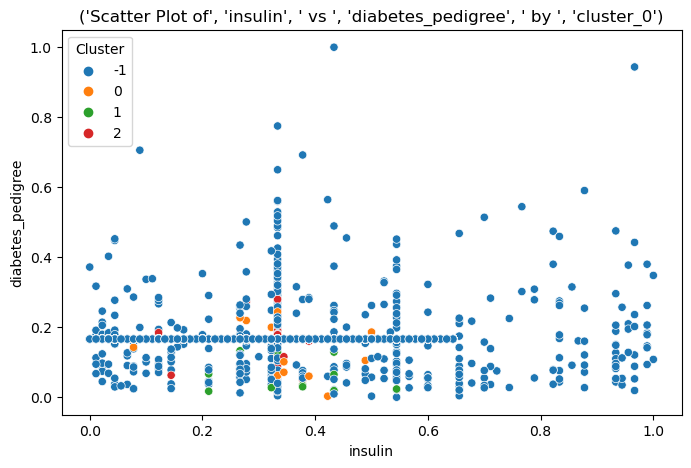

{'Model': 'Model_2', 'eps': 0.8, 'min_samples': 32, 'metric': 'manhattan', 'p': 1.2, 'silhouette_score': -0.05763791242775536, 'cluster': 'cluster_1'}


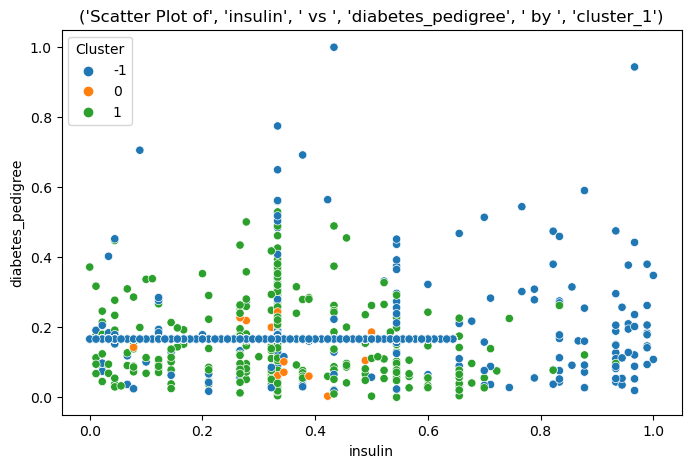

{'Model': 'Model_3', 'eps': 0.88, 'min_samples': 42, 'metric': 'manhattan', 'p': 1.4, 'silhouette_score': -0.10113728846990758, 'cluster': 'cluster_2'}


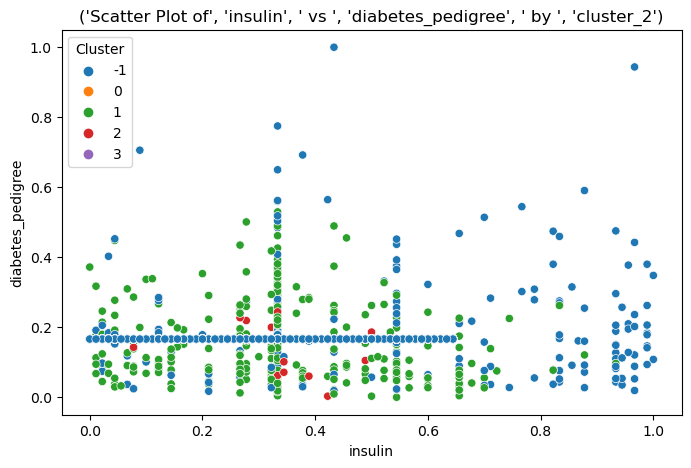

{'Model': 'Model_4', 'eps': 0.9, 'min_samples': 42, 'metric': 'manhattan', 'p': 1.8, 'silhouette_score': -0.06119906090595962, 'cluster': 'cluster_3'}


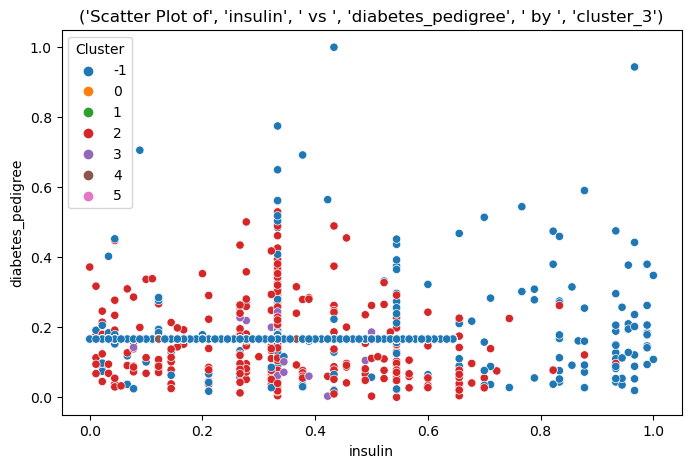

{'Model': 'Model_5', 'eps': 0.9, 'min_samples': 40, 'metric': 'manhattan', 'p': 1.0, 'silhouette_score': 0.2988681698847639, 'cluster': 'cluster_4'}


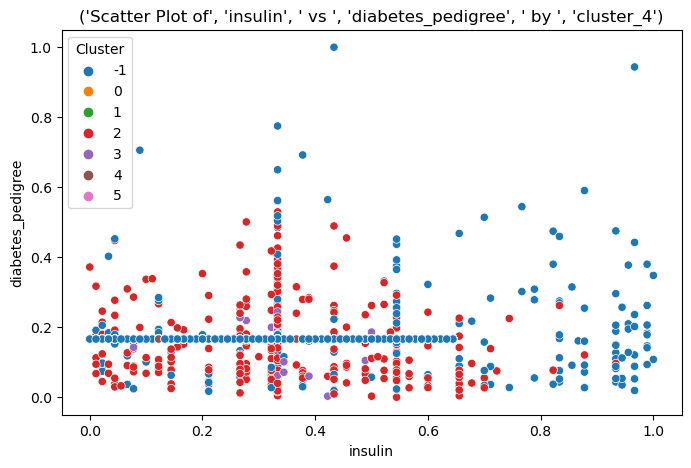

{'Model': 'Model_6', 'eps': 2.5, 'min_samples': 10, 'metric': 'euclidean', 'p': None, 'silhouette_score': 0.6489645357668227, 'cluster': 'cluster_5'}


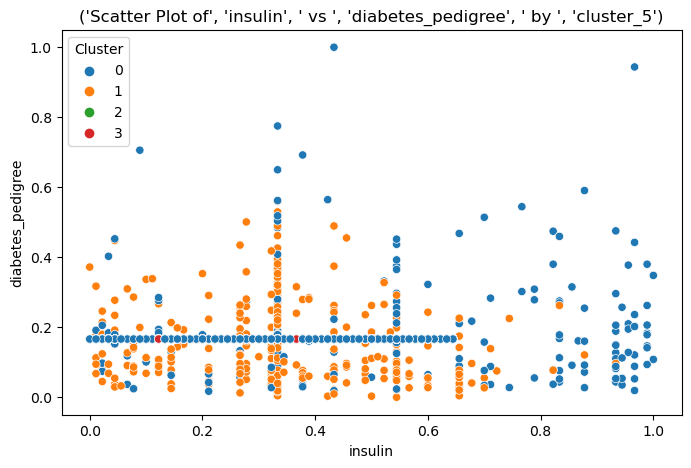

{'Model': 'Model_7', 'eps': 0.6, 'min_samples': 4, 'metric': 'minkowski', 'p': 2, 'silhouette_score': 0.3664360524512306, 'cluster': 'cluster_6'}


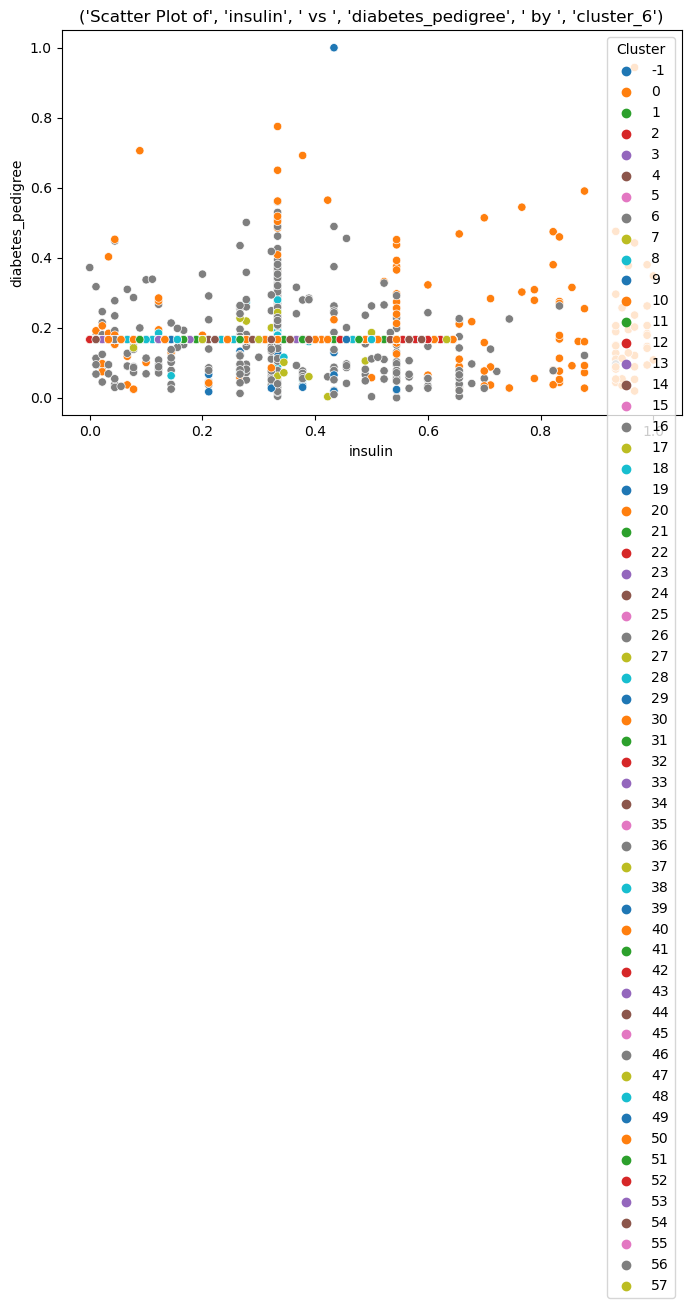

{'Model': 'Model_8', 'eps': 0.4, 'min_samples': 10, 'metric': 'minkowski', 'p': 2, 'silhouette_score': 0.10168790181683363, 'cluster': 'cluster_7'}


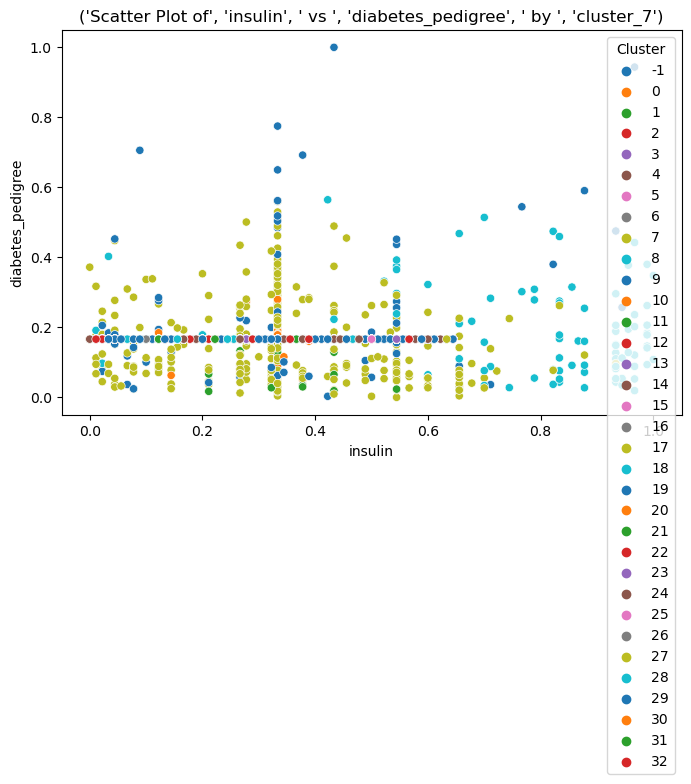

{'Model': 'Model_9', 'eps': 0.9, 'min_samples': 32, 'metric': 'euclidean', 'p': None, 'silhouette_score': 0.5474658850211335, 'cluster': 'cluster_8'}


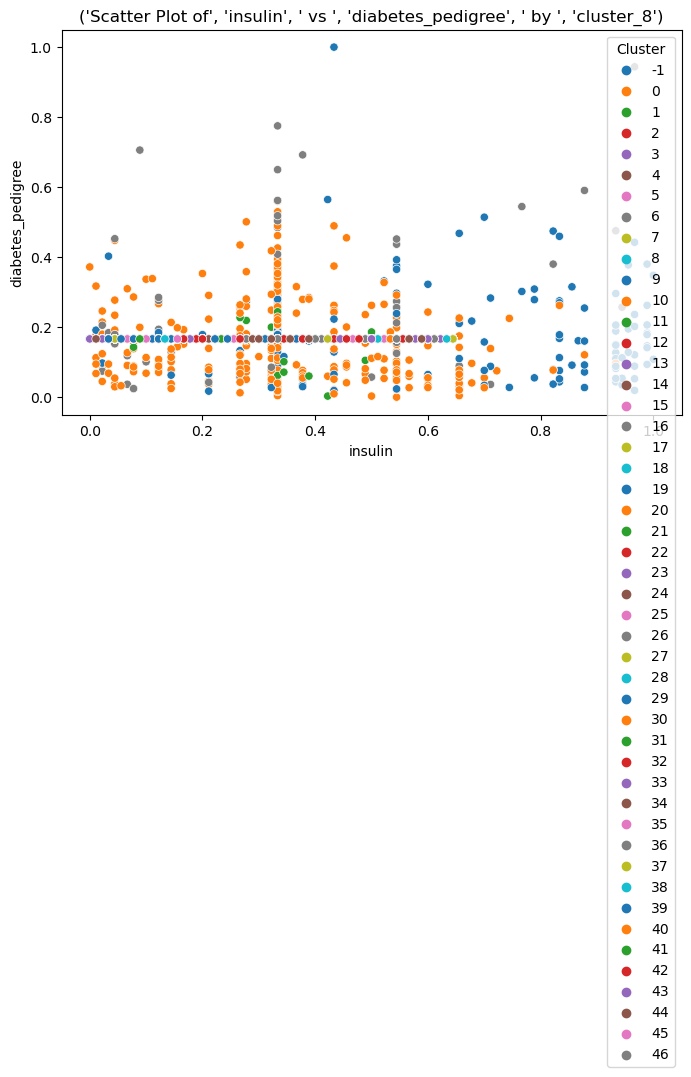

{'Model': 'Model_10', 'eps': 0.6, 'min_samples': 13, 'metric': 'manhattan', 'p': None, 'silhouette_score': -0.28122030262360304, 'cluster': 'cluster_9'}


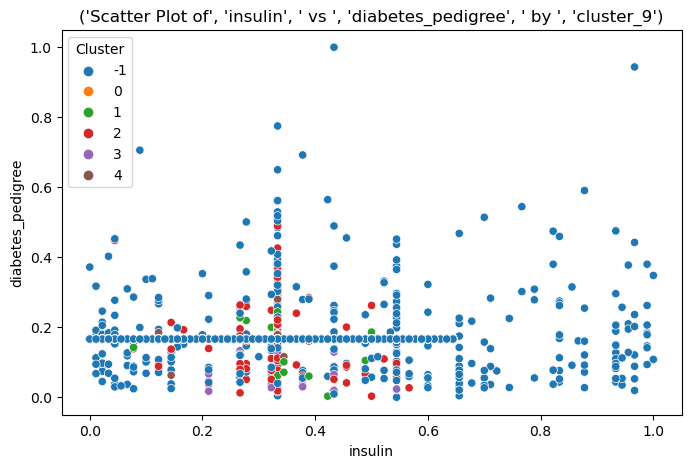

In [19]:
results = []
data_backup = scaled_data_frame
# Loop through each set of hyperparameters
for i, params in enumerate(hyperparams):
    # Initialize DBSCAN model with hyperparameters
    model = DBSCAN(eps=params['eps'], min_samples=params['min_samples'], 
                   metric=params['metric'], p=params['p'])
     
    # Fit the model and predict clusters
    clusters = model.fit_predict(scaled_data_frame)
    
    # Check if more than 1 cluster exists, otherwise assign a negative silhouette score
    if len(set(clusters)) <= 1:
        sil_score = -1
    else:
        sil_score = silhouette_score(scaled_data_frame, clusters)
    c = 'cluster_' + str(i)
    data_backup[c] = clusters
    print({
        'Model': f'Model_{i+1}',
        'eps': params['eps'],
        'min_samples': params['min_samples'],
        'metric': params['metric'],
        'p': params['p'],
        'silhouette_score': sil_score,
        'cluster': c
    })
    plot_scatter_plot(data_backup, 'insulin', 'diabetes_pedigree', c )
    
    # Append the model details and silhouette score to results
    results.append({
        'Model': f'Model_{i+1}',
        'eps': params['eps'],
        'min_samples': params['min_samples'],
        'metric': params['metric'],
        'p': params['p'],
        'silhouette_score': sil_score,
        'cluster': c
    })
    

In [20]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
results_df

Model   eps  min_samples     metric    p  silhouette_score    cluster
0   Model_1  0.60           28  manhattan  1.2         -0.143629  cluster_0
1   Model_2  0.80           32  manhattan  1.2         -0.057638  cluster_1
2   Model_3  0.88           42  manhattan  1.4         -0.101137  cluster_2
3   Model_4  0.90           42  manhattan  1.8         -0.061199  cluster_3
4   Model_5  0.90           40  manhattan  1.0          0.298868  cluster_4
5   Model_6  2.50           10  euclidean  NaN          0.648965  cluster_5
6   Model_7  0.60            4  minkowski  2.0          0.366436  cluster_6
7   Model_8  0.40           10  minkowski  2.0          0.101688  cluster_7
8   Model_9  0.90           32  euclidean  NaN          0.547466  cluster_8
9  Model_10  0.60           13  manhattan  NaN         -0.281220  cluster_9

In [21]:
data_backup.head()

age  gender  chest pain type  blood pressure  cholesterol  \
0  0.222222     1.0             0.50        0.761905     1.000000   
1  0.388889     0.0             0.75        0.952381     0.208333   
2  0.166667     1.0             0.50        0.666667     1.000000   
3  0.370370     0.0             1.00        0.742857     0.444444   
4  0.481481     1.0             0.75        0.857143     0.312500   

   max heart rate  exercise angina  plasma glucose  skin_thickness   insulin  \
0         0.53125              0.0        0.367528        0.282051  0.122222   
1         0.28125              0.0        0.138171        0.333333  0.100000   
2         0.28125              0.0        0.298026        0.410256  0.233333   
3         0.28125              1.0        0.117320        0.384615  0.411111   
4         0.28125              0.0        0.367528        0.884615  0.022222   

   ...  cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  cluster_5  \
0  ...         -1         -1         -1         -1         -1          0   
1  ...         -1         -1         -1         -1         -1          0   
2  ...         -1         -1         -1         -1         -1          0   
3  ...         -1         -1         -1         -1         -1          0   
4  ...         -1         -1         -1         -1         -1          0   

   cluster_6  cluster_7  cluster_8  cluster_9  
0          0          0          0         -1  
1          1         -1          1         -1  
2          0          0          0         -1  
3          2         -1          2         -1  
4          0          0          0         -1  

[5 rows x 30 columns]

### Explanation for Selection of Best Model

- Why We choose Model_6, Cluster_5 as our best model because it produces the best overall performance with the highest silhouette score (0.648965), appropriate distance metric (euclidean), and reasonable parameter values, making it the ideal choice for clustering.


Putting this factors together make Model_6 the best fit for this used case.



### Conclusion

Plotting insulin and diabetes_pedigree as they have very weak # correlation of -0.3

#### Plotting a scatter plot for two columns: insulin and diabetes_pedigree, colored by clusters

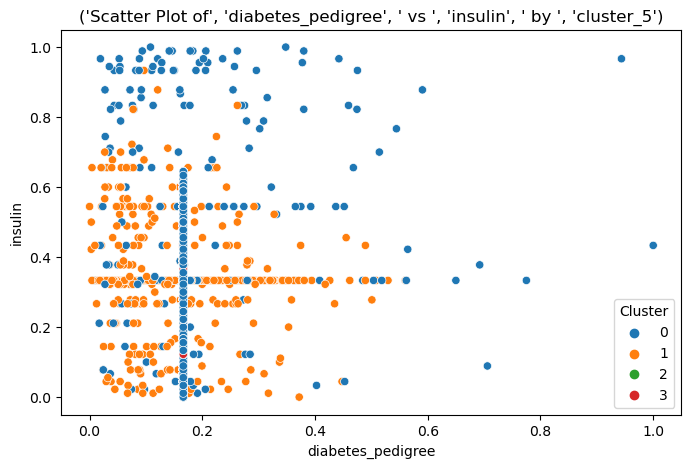

In [36]:
plot_scatter_plot(data_backup,  'diabetes_pedigree', 'insulin','cluster_5' )

## Explanation of Scatter Plot
This scatter plot visualizes the relationship between 'diabetes_pedigree' and 'insulin' levels across different clusters identified using a DBSCA.

- X-axis (Diabetes Pedigree): Represents a measure likely related to the genetic influence on diabetes, where higher values indicate a stronger genetic predisposition.
- Y-axis (Insulin): Shows insulin levels, which are crucial for managing blood glucose. Higher values could indicate higher insulin administration.

## Analysis of Clusters:
- Cluster -1 (Blue): These points are scattered throughout the plot, suggesting noise in the data. In DBSCAN, a cluster labeled "-1" typically represents outliers.
- Cluster 0 (Orange): Most of these points are concentrated at lower levels of both diabetes pedigree and insulin. This cluster may represent a group with lower genetic predisposition and lower insulin levels.
  
- Cluster 1 (Red): Concentrated in a narrow range of diabetes pedigree and mostly lower insulin levels. This might indicate individuals with a moderate genetic predisposition but controlled insulin levels.
  
- Cluster 2 (Green): Features a mix of insulin levels but consistently lower diabetes pedigree values, potentially representing those with lower genetic predisposition but varying insulin requirements.
  
- Cluster 3 (Purple): Very few points, situated at higher diabetes pedigree values and varying insulin levels. This group might include individuals at higher genetic risk.
- 
Conclusion:
The plot indicates that clustering has effectively grouped individuals based on their diabetes pedigree and insulin levels, potentially helping to identify patterns or subgroups that share similar characteristics in terms of their diabetes risk and treatment. The presence of outliers (Cluster -1) also helps in identifying points that do not fit well with typical groupings, which could be significant in medical diagnostics or treatment approaches.


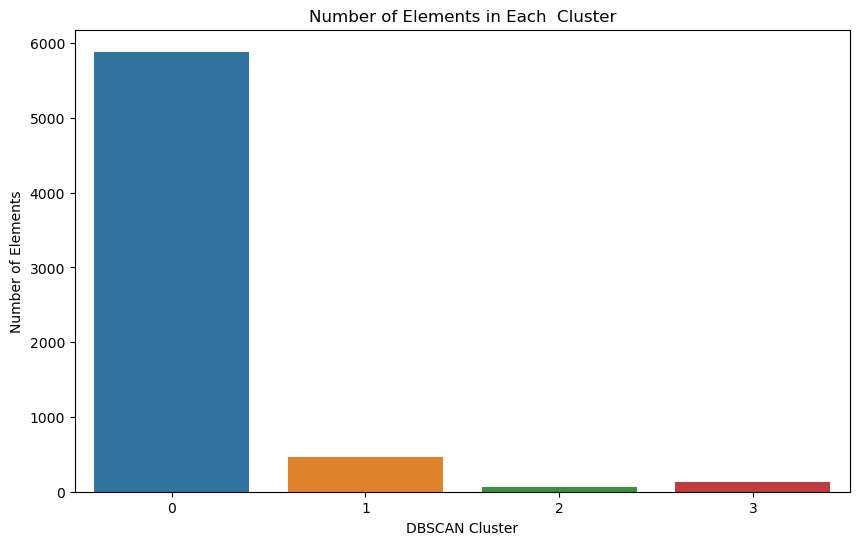

In [25]:
cluster_data =pd.DataFrame(data_backup['cluster_5'])
cluster_data

# Plotting a histogram showing the number of elements in each Agglomerative cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_5', data=cluster_data, palette='tab10')
plt.title('Number of Elements in Each  Cluster')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Number of Elements')
plt.show()


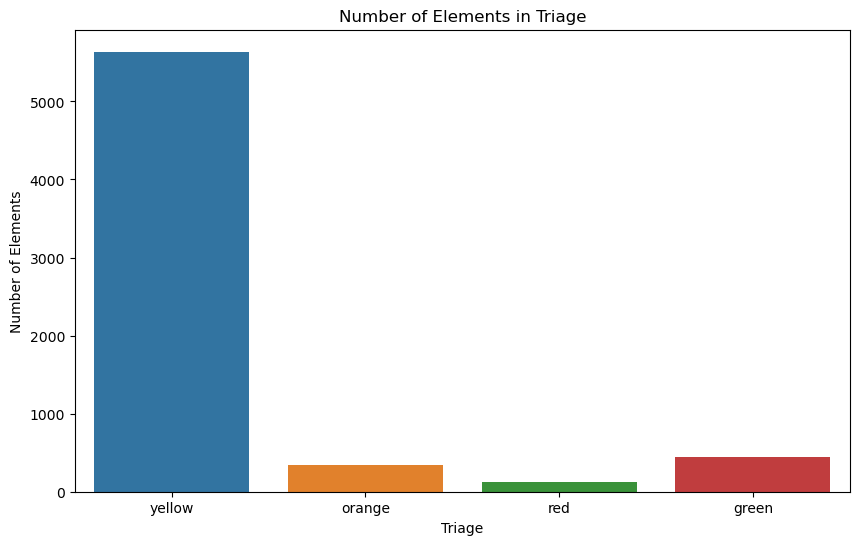

In [26]:
# Plotting a histogram showing the number of elements in each Agglomerative cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='triage', data=data, palette='tab10')
plt.title('Number of Elements in Triage')
plt.xlabel('Triage')
plt.ylabel('Number of Elements')
plt.show()

### Explanation of Histogram
The Histogram indicates the distribution of elements across different triage categories and color coding representation. 

- Yellow: represents a medium urgency in triage systems, where patients need to be seen soon but do not have immediately life-threatening conditions. 

- Orange: This showed patients who are in serious condition and need medical attention quickly, but are not the most critical. 

- Red: This are the most critical cases that require immediate and urgent medical attention. 

- Green: This is refered as a non-urgent cases, where patients will need medical care but can afford to wait without immediate risks. T

Overall, this distribution suggests a typical scenario in emergency departments or other medical triage environments where most cases are of medium urgency (yellow), fewer are in serious (orange) or non-urgent (green) conditions, and only a small number are critical (red).

### Descritive Statistics For each clusters

In [28]:
# Describing each cluster
cluster_descriptions = {}
for cluster in data_backup['cluster_5'].unique():
    cluster_data = data_backup[data_backup['cluster_5'] == cluster]
    cluster_descriptions[cluster] = pd.DataFrame(cluster_data.describe())

# Convert cluster descriptions into a dictionary of dataframes
cluster_descriptions 

{0:                age       gender  chest pain type  blood pressure  cholesterol  \
 count  5886.000000  5886.000000      5886.000000     5886.000000  5886.000000   
 mean      0.569723     0.515121         0.156006        0.507094     0.254195   
 std       0.222510     0.499814         0.335346        0.190142     0.234922   
 min       0.000000     0.000000         0.000000        0.000000     0.000000   
 25%       0.393519     0.000000         0.000000        0.352381     0.104167   
 50%       0.555556     1.000000         0.000000        0.533333     0.208333   
 75%       0.740741     1.000000         0.000000        0.657143     0.305556   
 max       1.000000     1.000000         1.000000        1.000000     1.000000   
 
        max heart rate  exercise angina  plasma glucose  skin_thickness  \
 count     5886.000000      5886.000000     5886.000000     5886.000000   
 mean         0.395196         0.072715        0.293271        0.484034   
 std          0.243196         0

### Conclusion

## Cluster Descriptions

## Cluster 0 (Blue) Description:
The blue points in Cluster 0 are spread across a wide range of insulin values, with many points between 0.0 and 0.6 on the insulin axis. The diabetes pedigree ranges from 0.0 to 1.0, covering nearly the full span of the x-axis.

Key Insights:
- This cluster shows wide variability in diabetes pedigree and a significant portion of patients with lower insulin values (under 0.6).
- Patients in this cluster may exhibit a variety of risk levels based on diabetes pedigree, though many of them have lower insulin, indicating possible diabetes or insulin resistance concerns.
- 
## Cluster 1 (Orange) Description:
The orange points of Cluster 1 are primarily concentrated at low to medium insulin levels, between 0.0 and 0.6 on the insulin axis, with most diabetes pedigree values under 0.4.

Key Insights:
- Cluster 1 tends to have relatively lower diabetes pedigree values (a measure often linked to genetic risk factors for diabetes), but many of them are also at low insulin levels.
- This could indicate a significant portion of people in this cluster are insulin-resistant or have low insulin production, which could suggest early stages of diabetes.

## Cluster 2 (Green) Description:
Cluster 2 (green points) appears to be sparsely distributed, with the points positioned at mid-range insulin values between 0.2 and 0.6 and diabetes pedigree values between 0.2 and 0.6. This cluster shows a moderate spread, neither too low nor too high for either metric.

Key Insights:
- Moderate insulin levels suggest that individuals in this cluster may not yet have severe issues related to insulin resistance or deficiency. 
- Diabetes pedigree values being in the mid-range indicates these individuals have a moderate genetic risk of diabetes. 

## Cluster 3 (Red) Description:
Cluster 3 (red points) is situated primarily in the lower-left portion of the scatter plot, with diabetes pedigree values mostly below 0.4 and insulin values under 0.2. This indicates that these individuals have both low insulin and low diabetes pedigree.

Key Insights:
- Low insulin levels suggest that these individuals may have significant issues related to insulin production or resistance.
- Low diabetes pedigree implies a lower genetic risk of diabetes, but this doesn’t exclude them from having issues related to insulin regulation, as they are clustering in the very low insulin range.


## Urgency in Care Ranking 
- Cluster 0 (Blue) – Moderate Urgency:
Why? While Cluster 0 also shows some patients with low insulin, the wider spread in diabetes pedigree and a broader distribution across the insulin spectrum suggests a more mixed group. Some patients may require care urgently, but others may not have as immediate concerns based on their position on the plot.

- Cluster 1 (Orange) – Higher Urgency:
Why? The concentration of points in lower insulin levels and relatively low diabetes pedigree indicates that this group may have an increased risk of metabolic disorders or may be in the early stages of diabetes. Patients here likely need more immediate medical intervention to prevent worsening conditions.

- Cluster (Green) 2: - Moderate Urgency:
Why? The moderate levels of both insulin and diabetes pedigree suggest that individuals in Cluster 2 are neither at the very high nor very low extremes of risk. However, this doesn’t mean they should be overlooked, as their risk could increase over time, particularly if there are other factors such as diet or lifestyle involved. Preventative care and regular monitoring could help mitigate the progression of any potential metabolic disorders or diabetes.

- Cluster 3 (Red):Higher Urgency:
 Why? The combination of very low insulin levels in Cluster 3 makes this group concerning. Even though their diabetes pedigree is lower, the extremely low insulin values might indicate advanced stages of insulin deficiency or prediabetes/diabetes. Individuals in this group should seek medical evaluation promptly to assess their risk of developing or managing diabetes and related metabolic conditions.